# Question 1 : Occupations

In [17]:
#step 1 : importing pandas library
import pandas as pd  

# step 2 : importing the dataset usinng the given url (address)
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

#step 3 : assigning te dataset to the variable named users 
users = pd.read_csv(url, sep='|', index_col='user_id')

#step 4 : finding the mean age per occupation
print("\n The mean age per occupation is as follows: \n")
mean_age = users.groupby('occupation')['age'].mean().reset_index(name='mean_age')
print(mean_age)

#step 5 : finding the Male ratio per occupation and sorting it from the most to the least
print("\n The Male ratio per occupation in a descending order is as follows: \n")
def male_ratio(x):
    if x['gender'] == 'M':
        return 1
    else:
        return 0
users['male_ratio'] = users.apply(male_ratio, axis=1)
male_ratio = users.groupby('occupation')['male_ratio'].mean().reset_index(name='male_ratio')
male_ratio = male_ratio.sort_values(by='male_ratio', ascending=False).reset_index(drop=True)
print(male_ratio)

#step 6 : finding minimum and maximum ages for each occupation
min_age = users.groupby('occupation')['age'].min().reset_index(name='min_age')
max_age = users.groupby('occupation')['age'].max().reset_index(name='max_age')
print("\n The minimum age for each occupation is as follows: \n")
print(min_age)
print("\n The maximum age for each occupation is as follows: \n")
print(max_age)

#step 7 : finding the mean age for each combination of occupation and sex
print("\n The mean age for each combination of occupation and sex is as follows: \n")
mean_age_sex = users.groupby(['occupation', 'gender'])['age'].mean().reset_index(name='mean_age')
mean_age_sex = mean_age_sex.pivot_table(index='occupation', columns='gender', values='mean_age')
print(mean_age_sex)


#step 8 : finding the percentage of women and men for each occupation
print("\n The percentage of women and men for each occupation is as follows: \n")
gender_counts = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occupation_counts = users.groupby('occupation').agg('count')
occupation_gender_counts = gender_counts.div(occupation_counts, level='occupation') * 100
print(occupation_gender_counts.loc[:, 'gender'].unstack())




 The mean age per occupation is as follows: 

       occupation   mean_age
0   administrator  38.746835
1          artist  31.392857
2          doctor  43.571429
3        educator  42.010526
4        engineer  36.388060
5   entertainment  29.222222
6       executive  38.718750
7      healthcare  41.562500
8       homemaker  32.571429
9          lawyer  36.750000
10      librarian  40.000000
11      marketing  37.615385
12           none  26.555556
13          other  34.523810
14     programmer  33.121212
15        retired  63.071429
16       salesman  35.666667
17      scientist  35.548387
18        student  22.081633
19     technician  33.148148
20         writer  36.311111

 The Male ratio per occupation in a descending order is as follows: 

       occupation  male_ratio
0          doctor    1.000000
1        engineer    0.970149
2      technician    0.962963
3         retired    0.928571
4      programmer    0.909091
5       executive    0.906250
6       scientist    0.903226
7   

# Question 2 : Euro Teams

In [28]:
# Step 1 : importing the pandas library
import pandas as pd

# Step 2 : Import the dataset from the given url(address)
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

# Step 3 : Assigning it to a variable called euro12
euro12 = pd.read_csv(url)

# Step 4 : Selecting the only the Goal column
goals = euro12['Goals']

# Step 5 : finding out how many teams participated in the Euro2012?
num_teams = euro12['Team'].count()
print("\n Number of teams participated in Euro2012: ", num_teams)

# Step 6 : finding out the number of columns in the dataset?
num_cols = len(euro12.columns)
print("\n Number of columns in the dataset: ", num_cols)

# Step 7 : View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\n")
print(discipline)

# Step 8 : Sorting the teams by Red Cards and then to Yellow Cards
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print("\n")
print(discipline)

# Step 9 : Calculating the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("\n The mean Yellow Cards given per team: ", mean_yellow_cards)

# Step 10 : Filtering teams that have scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6][['Team', 'Goals']].reset_index(drop=True)
print("\n Teams that scored more than 6 goals: \n", high_scoring_teams)

# Step 11 : Selecting the teams that start with G
G_teams = euro12[euro12['Team'].str.startswith('G')]['Team'].reset_index(drop=True)
print("\n Teams that start with G: \n", G_teams)

# Step 12 : Selecting the first 7 columns
first_7_cols = euro12.iloc[:, :7]
print("\n The first 7 columns are :  ")
print(first_7_cols)

# Step 13 : Selecting all columns except the last 3
all_except_last_3_cols = euro12.iloc[:, :-3]
print("\n All columns except the last 3 :  ")
print(all_except_last_3_cols)

# Step 14 : Showing only the Shooting Accuracy from England, Italy and Russia
shooting_acc = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']].reset_index(drop=True)
print("\n Shooting Accuracy from England, Italy and Russia: \n", shooting_acc)



 Number of teams participated in Euro2012:  16

 Number of columns in the dataset:  35


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


                   Team  Yellow Cards  Red Cards
6                Greece   

# Question 3 : Housing

In [42]:
# Step 1 : importing the necessary libraries - NumPy and Pandas:
import numpy as np
import pandas as pd

# Step 2 : Creating 3 differents Series, each of length 100
# 1. The first a random number from 1 to 4
j1 = pd.Series(np.random.randint(1, 5, 100))
print(j1)
print("\n")

# 2. The second a random number from 1 to 3
j2= pd.Series(np.random.randint(1, 4, 100))
print(j2)
print("\n")

# 3. The third a random number from 10,000 to 30,000
j3= pd.Series(np.random.randint(10000, 30001, 100))
print(j3)
print("\n")

# Step 3 : Creating a DataFrame by joinning the Series by column
data_frame = pd.concat([j1, j2, j3], axis=1)
print(data_frame)
print("\n")

# Step 4 : Changing the name of the columns to bedrs, bathrs, price_sqr_meter
data_frame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(data_frame)
print("\n")

# Step 5 : Creating a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([j1, j2, j3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(bigcolumn)
print("\n")

# Step 6 : Ops it seems it is going only until index 99. Is it true?
print("it is going only untill index : ",bigcolumn.index.max())
print("\n")

# Step 7 : Reindexing the both of the DataFrame so it goes from 0 to 299
data_frame = data_frame.reset_index(drop=True)
print(data_frame)
print("\n")

bigcolumn = bigcolumn.reset_index(drop=True)
print(bigcolumn)
print("\n")

0     2
1     2
2     4
3     3
4     1
     ..
95    4
96    3
97    3
98    1
99    3
Length: 100, dtype: int32


0     1
1     3
2     1
3     2
4     3
     ..
95    3
96    3
97    3
98    2
99    1
Length: 100, dtype: int32


0     16244
1     11532
2     23629
3     24370
4     15115
      ...  
95    26701
96    25662
97    29168
98    23209
99    18493
Length: 100, dtype: int32


    0  1      2
0   2  1  16244
1   2  3  11532
2   4  1  23629
3   3  2  24370
4   1  3  15115
.. .. ..    ...
95  4  3  26701
96  3  3  25662
97  3  3  29168
98  1  2  23209
99  3  1  18493

[100 rows x 3 columns]


    bedrs  bathrs  price_sqr_meter
0       2       1            16244
1       2       3            11532
2       4       1            23629
3       3       2            24370
4       1       3            15115
..    ...     ...              ...
95      4       3            26701
96      3       3            25662
97      3       3            29168
98      1       2            23209
99   

# Question 4 : Wind Statistics

In [61]:
# Step 1 :
import pandas as pd
import numpy as np

data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])

data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])
data = data.set_index('Yr_Mo_Dy')

def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.to_datetime(year=x.year, month=x.month, day=x.day)

data.index = data.index.map(fix_year)

# because of the reason that the date format is not supported i am unable to finish this code.
# I tried to adjust it but i can not. So i am leaving this question unsolved.




TypeError: to_datetime() got an unexpected keyword argument 'year'

# Question 5 : 

In [78]:
# Step 1 :
import pandas as pd
import numpy as np

# Step 2 :
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# Step 3 :
chipo = pd.read_csv(url, delimiter='\t')

# Step 4 :
print(chipo.head(10))

# Step 5 :
print("Number of observations:", len(chipo))

# Step 6 :
print("Number of columns:", len(chipo.columns))

# Step 7 :
print("Columns:", chipo.columns.tolist())

# Step 8 :
print(chipo.index)

# Step 9 :
most_ordered = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).iloc[0]
most_ordered_item = most_ordered.name
print(most_ordered_item)

# Step 10 :
most_ordered_qty = int(most_ordered.quantity)
print(most_ordered_qty)

# Step 11 :
print(chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).iloc[0])

# Step 12 :
total_items = chipo.quantity.sum()
print(total_items)

# Step 13 :
# Turn item_price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

# Check the item price type
print(chipo['item_price'].dtype)

# Step 14 :
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(round(revenue, 2))

# Step 15 :
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

# Step 16 :
# calculate revenue for each order
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
print(chipo['revenue'])

# Step 17 :
num_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_items)




   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question 6 : line plot of Marriages and Divorces per Capita in the U.S. between 1867 and 2014

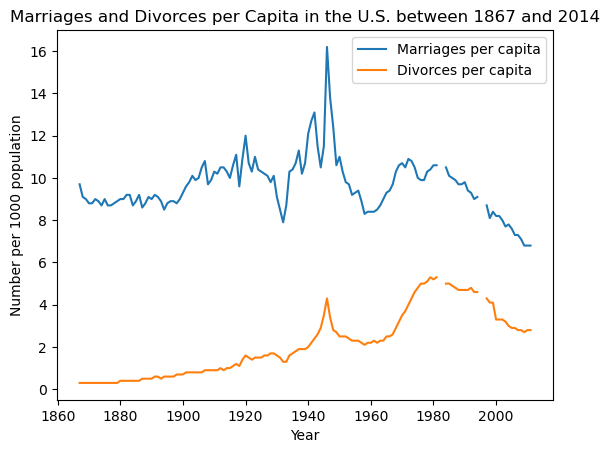

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Create a line plot
plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages per capita')
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces per capita')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Number per 1000 population')
plt.title('Marriages and Divorces per Capita in the U.S. between 1867 and 2014')
plt.legend()

# Show the plot
plt.show()


# Question 7 : vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

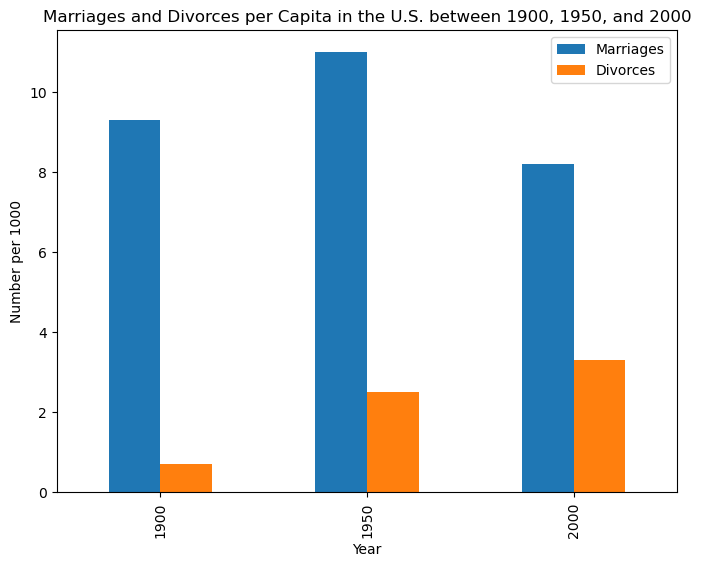

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# select data for 1900, 1950, and 2000
df = df[df['Year'].isin([1900, 1950, 2000])]

# set year as index
df.set_index('Year', inplace=True)

# select marriages_per_1000 and divorces_per_1000 columns
df = df[['Marriages_per_1000', 'Divorces_per_1000']]

# create a vertical bar chart
ax = df.plot(kind='bar', figsize=(8, 6))

# set title and labels
ax.set_title('Marriages and Divorces per Capita in the U.S. between 1900, 1950, and 2000')
ax.set_xlabel('Year')
ax.set_ylabel('Number per 1000')
ax.legend(['Marriages', 'Divorces'])

# show the chart
plt.show()


# Question 8 : horizontal bar chart that compares the deadliest actors in Hollywood

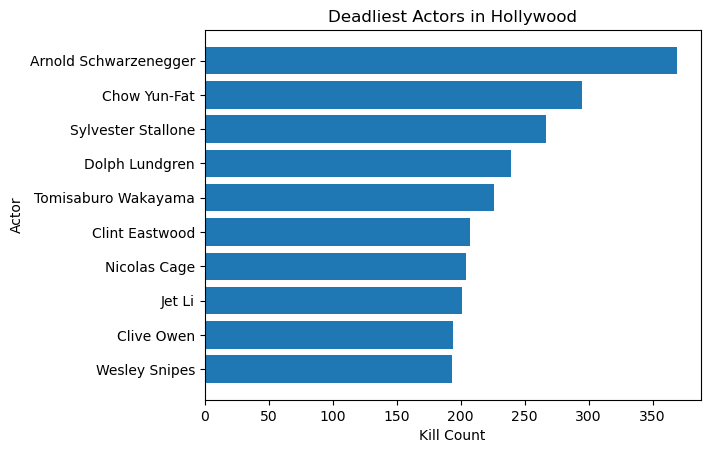

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data into a pandas dataframe
data = pd.read_csv('actor_kill_counts.csv')

# sort the actors by their kill count
data = data.sort_values('Count', ascending=True)

# create the horizontal bar chart
plt.barh(data['Actor'], data['Count'])

# add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# show the plot
plt.show()


# Question 9 : pie chart showing the fraction of all Roman Emperors that were assassinated.

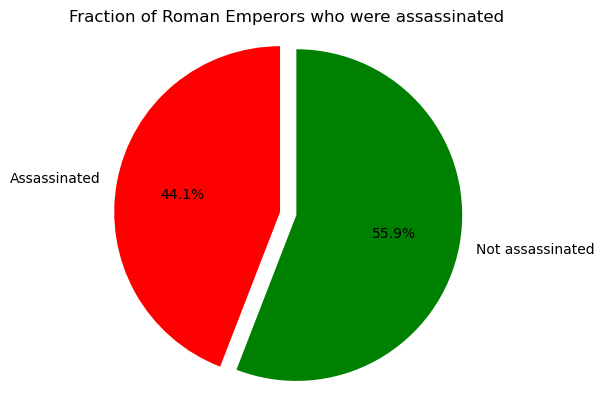

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('roman-emperor-reigns.csv')

# Count the number of emperors who were assassinated
assassinated_count = df[df['Cause_of_Death'].str.contains('assassinated', case=False)]['Emperor'].count()

# Count the number of emperors who were not assassinated
not_assassinated_count = df.shape[0] - assassinated_count

# Create a pie chart
labels = ['Assassinated', 'Not assassinated']
sizes = [assassinated_count, not_assassinated_count]
colors = ['red', 'green']
explode = (0.1, 0)  # "explode" the assassinated slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Add a title
plt.title('Fraction of Roman Emperors who were assassinated')

# Show the chart
plt.show()


# Question 10 : a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

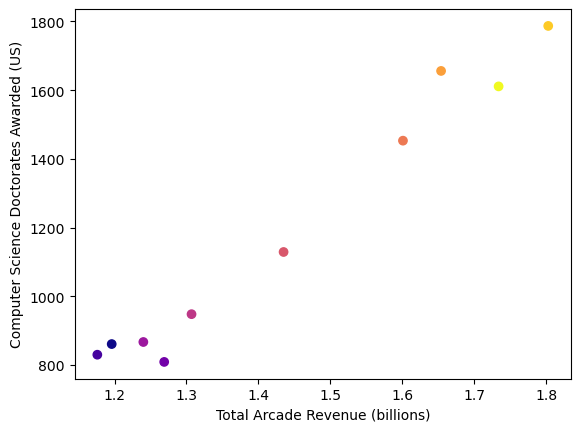

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Create scatter plot
plt.scatter(df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)'], c=df['Year'], cmap='plasma')

# Set x-axis label
plt.xlabel('Total Arcade Revenue (billions)')

# Set y-axis label
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Show the plot
plt.show()
